<a href="https://colab.research.google.com/github/rko7/Kaggle_ML-Project/blob/main/Course_Project_Comparing_Classifiers_(FLD_vs_Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time

**Reading Dataset**

In [ ]:
# load the dataset to pandas Dataframe
df = pd.read_csv('/content/heart_2022_no_nans.csv')

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


**Dataset Info**

In [ ]:
df.shape

(246022, 40)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


**Check Null Values**

In [ ]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


**Drop all the missing values**

In [ ]:
df = df.dropna()

**Check Duplicates**

In [ ]:
df.duplicated().sum()

9

**Drop Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)

**Categorize Age groups**

In [ ]:
to_replace = [
    ['Age 18 to 24', 'Age 25 to 29'],
    ['Age 30 to 34','Age 35 to 39'],
    ['Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64'],
    ['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']
]

new_categories = ['Young Adult', 'Adult', 'Middle-Aged Adult', 'Senior']

for old_values, new_value in zip(to_replace, new_categories):
    df['AgeCategory'] = df['AgeCategory'].replace(old_values, new_value)

**Label Encoding**

In [ ]:
encoding_dict = {"GeneralHealth":{'Excellent': 4,'Very good': 3,'Good': 2, 'Fair':1, 'Poor': 0},
            "LastCheckupTime":{"Within past year (anytime less than 12 months ago)": 4,
                               "Within past 2 years (1 year but less than 2 years ago)": 3,
                               "Within past 5 years (2 years but less than 5 years ago)": 2,
                               "5 or more years ago": 1,
                               "Never": 0},
            "RemovedTeeth":{"None of them": 3, "1 to 5": 2, "6 or more, but not all": 1, "All": 0},
            "HadDiabetes":{"No":3, "No, pre-diabetes or borderline diabetes":2, "Yes, but only during pregnancy (female)":1, "Yes":0},
            "SmokerStatus":{"Never smoked":3, "Former smoker":2, "Current smoker - now smokes some days": 1, "Current smoker - now smokes every day":0},
            "ECigaretteUsage":{"Never used e-cigarettes in my entire life": 3, "Not at all (right now)": 2, "Use them some days": 1, "Use them every day": 0},
            "RaceEthnicityCategory":{"Black only, Non-Hispanic":4, "Hispanic":3,"Multiracial, Non-Hispanic":2, "Other race only, Non-Hispanic":1, "White only, Non-Hispanic":0},
            "AgeCategory":{"Young Adult":3, "Adult":2, "Middle-Aged Adult":1, "Senior":0},
            "TetanusLast10Tdap":{"Yes, received Tdap":3, "Yes, received tetanus shot, but not Tdap":2, "Yes, received tetanus shot but not sure what type":1, "No, did not receive any tetanus shot in the past 10 years":0},
            "CovidPos": {"Yes": 2, "Tested positive using home test without a health professional":1, "No":0}}

df.replace(encoding_dict, inplace=True)

# Convert categorical 'State' column to numeric codes
df['State'] = df['State'].astype('category').cat.codes

In [ ]:
# Encode remaining binary categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,3,4.0,0.0,4,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,3,0,0
1,0,1,3,0.0,0.0,4,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,0,1,3,0.0,0.0,4,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,4,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,4,1,5.0,2,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


In [ ]:
df.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
246017,48,1,3,0.0,0.0,3,1,6.0,3,0,...,1.78,102.06,32.28,1,0,0,0,1,0,0
246018,48,0,1,0.0,7.0,4,1,7.0,3,0,...,1.93,90.72,24.34,0,0,0,0,0,0,2
246019,48,1,2,0.0,15.0,4,1,7.0,2,0,...,1.68,83.91,29.86,1,1,1,1,1,0,2
246020,48,0,4,2.0,2.0,4,1,7.0,3,0,...,1.70,83.01,28.66,0,1,1,0,1,0,0
246021,48,1,3,0.0,0.0,4,0,5.0,3,1,...,1.83,108.86,32.55,0,1,1,1,0,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  int8   
 1   Sex                        246013 non-null  int64  
 2   GeneralHealth              246013 non-null  int64  
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  int64  
 6   PhysicalActivities         246013 non-null  int64  
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  int64  
 9   HadHeartAttack             246013 non-null  int64  
 10  HadAngina                  246013 non-null  int64  
 11  HadStroke                  246013 non-null  int64  
 12  HadAsthma                  246013 non-null  int64  
 13  HadSkinCancer              246013 

In [ ]:
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

**Train Test Split**

In [ ]:
# split the data into training data and test data (X represents data, Y represents label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

print(X.shape, X_train.shape, X_test.shape)

(246013, 39) (184509, 39) (61504, 39)


# **Fisher's Linear Discriminant (FLD)**

**Training the Model**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
start_time = time.time()

In [ ]:
# train the Fisher's Linear Discriminant (FLD) Model
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

**Timing the Training Process**

In [ ]:
lda_training_time = time.time() - start_time
print("Training time: {:.2f} seconds".format(lda_training_time))
start_time = time.time()

Training time: 1.04 seconds


**Model Evaluation**

In [ ]:
y_test_prediction = lda.predict(X_test)

**Timing the Testing Process**

In [ ]:
lda_testing_time = time.time() - start_time
print("Testing time: {:.2f} seconds".format(lda_testing_time))

Testing time: 0.05 seconds


**EXTRA: Accuracy Score on the Training Data**

In [ ]:
y_train_prediction = lda.predict(X_train)
lda_training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print('Training Data Accuracy: {:.2%}'.format(lda_training_data_accuracy))

Training Data Accuracy: 93.98%


**Accuracy Score on the Testing Data**

In [ ]:
lda_test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print('Test Data Accuracy: {:.2%}'.format(lda_test_data_accuracy))

Test Data Accuracy: 93.93%


**Confusion Matrix: Fisher's Linear Discriminant (FLD)**

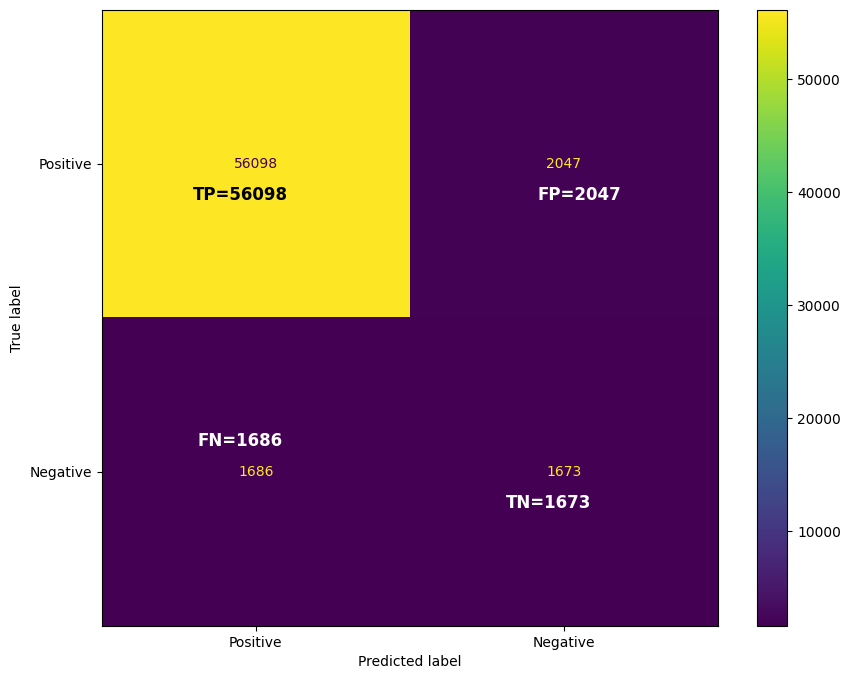

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     58145
           1       0.45      0.50      0.47      3359

    accuracy                           0.94     61504
   macro avg       0.71      0.73      0.72     61504
weighted avg       0.94      0.94      0.94     61504



In [ ]:
cm = confusion_matrix(y_test, y_test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positive', 'Negative'])

#cm_display.plot()
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
cm_display.plot(ax=ax, colorbar=True)  # Adjust colormap for better visibility

# Labels for annotations
labels = ['TP', 'FP', 'FN', 'TN']
counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels_counts = [f"{label} = {count}" for label, count in zip(labels, counts)]

# Adjusted positions for TP, FP, FN, TN labels
positions = [(0, 0), (1, 0), (0, 1), (1, 1)]
colors = ['black', 'white', 'white', 'white']  # Choose colors based on cell color for visibility

# Adjusting label positions and font size
for label, count, pos, color in zip(labels, counts, positions, colors):
    x, y = pos
    # Slight adjustment to `x` and `y` to prevent overlap
    offset_x = 0.05 if 'FP' in label else -0.05
    offset_y = -0.1 if 'FN' in label else 0.1
    ax.text(x + offset_x, y + offset_y, f"{label}={count}", ha='center', va='center',
            color=color, fontsize=12, fontweight='bold')
plt.show()

print(classification_report(y_test, y_test_prediction))

# **Random Forest (RF)**

**Training the Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()

In [ ]:
# train the Random Forest Classifier
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Timing the Training Process**

In [ ]:
rf_training_time = time.time() - start_time
print("Training time: {:.2f} seconds".format(rf_training_time))
start_time = time.time()

Training time: 35.09 seconds


**Model Evaluation**

In [ ]:
y_test_prediction = rf.predict(X_test)

**Timing the Testing Process**

In [ ]:
rf_testing_time = time.time() - start_time
print("Testing time: {:.2f} seconds".format(rf_testing_time))

Testing time: 2.36 seconds


**EXTRA: Accuracy Score on the Training Data**

In [ ]:
y_train_prediction = rf.predict(X_train)
rf_training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print('Training Data Accuracy: {:.2%}'.format(rf_training_data_accuracy))

Training Data Accuracy: 99.99%


**Accuracy Score on the Testing Data**

In [ ]:
rf_test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print('Test Data Accuracy: {:.2%}'.format(rf_test_data_accuracy))

Test Data Accuracy: 94.80%


**Confusion Matrix: Random Forest (RF)**

Confusion Matrix:


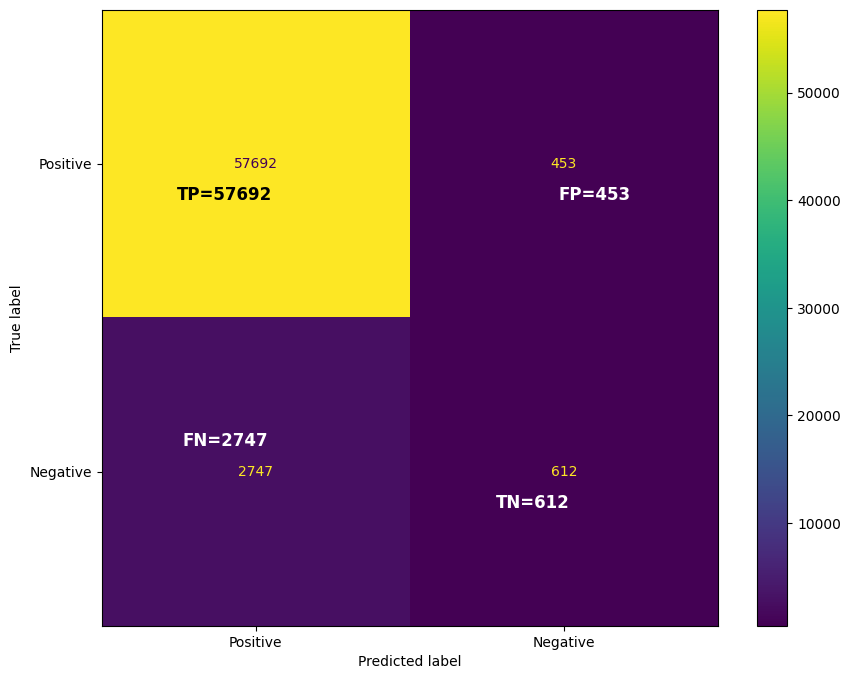

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     58145
           1       0.57      0.18      0.28      3359

    accuracy                           0.95     61504
   macro avg       0.76      0.59      0.62     61504
weighted avg       0.93      0.95      0.93     61504



In [ ]:
cm = confusion_matrix(y_test, y_test_prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positive', 'Negative'])
#cm_display.plot()
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
cm_display.plot(ax=ax, colorbar=True)  # Adjust colormap for better visibility

# Labels for annotations
labels = ['TP', 'FP', 'FN', 'TN']
counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels_counts = [f"{label} = {count}" for label, count in zip(labels, counts)]

# Adjusted positions for TP, FP, FN, TN labels
positions = [(0, 0), (1, 0), (0, 1), (1, 1)]
colors = ['black', 'white', 'white', 'white']  # Choose colors based on cell color for visibility

# Adjusting label positions and font size
for label, count, pos, color in zip(labels, counts, positions, colors):
    x, y = pos
    # Slight adjustment to `x` and `y` to prevent overlap
    offset_x = 0.1 if 'FP' in label else -0.1
    offset_y = -0.1 if 'FN' in label else 0.1
    ax.text(x + offset_x, y + offset_y, f"{label}={count}", ha='center', va='center',
            color=color, fontsize=12, fontweight='bold')

print("Confusion Matrix:")
plt.show()

print(classification_report(y_test, y_test_prediction))

# **Compare the Classifiers**

In [ ]:
# Define metrics for comparison
metrics = {
    'Model': ['FLD', 'RF'],
    'Training Time (s)': [lda_training_time, rf_training_time],
    'Testing Time (s)': [lda_testing_time, rf_testing_time],
    'Training Accuracy (%)': [lda_training_data_accuracy * 100, rf_training_data_accuracy * 100],
    'Testing Accuracy (%)': [lda_test_data_accuracy * 100, rf_test_data_accuracy * 100]
}

# Create a DataFrame from the metrics
comparison_df = pd.DataFrame(metrics)

# Display the comparison DataFrame
print("Comparison of FLD and RF Models:")
print(comparison_df)

Comparison of FLD and RF Models:
  Model  Training Time (s)  Testing Time (s)  Training Accuracy (%)  \
0   FLD           1.035802          0.053790              93.976988   
1    RF          35.086035          2.361222              99.993496   

   Testing Accuracy (%)  
0             93.930476  
1             94.797086  


**Visualization of the comparison**

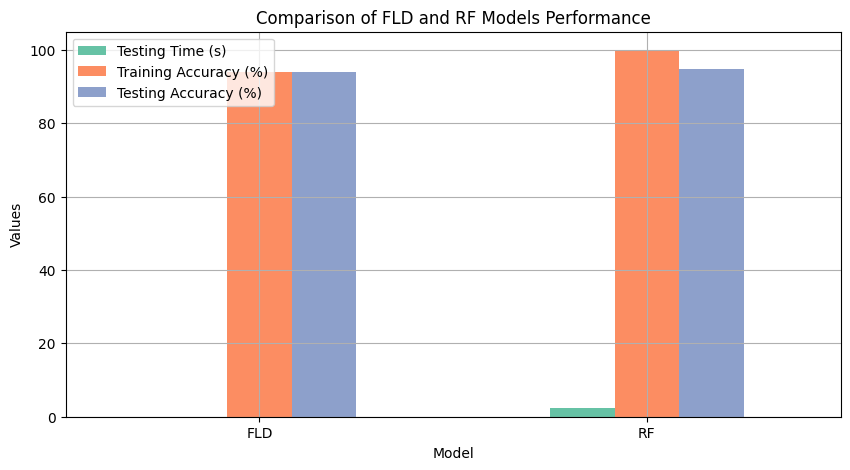

In [ ]:
# Create a bar chart
comparison_df.set_index('Model').iloc[:, 1:].plot(kind='bar', figsize=(10, 5),  color=sns.mpl_palette("Set2"))
plt.title('Comparison of FLD and RF Models Performance')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

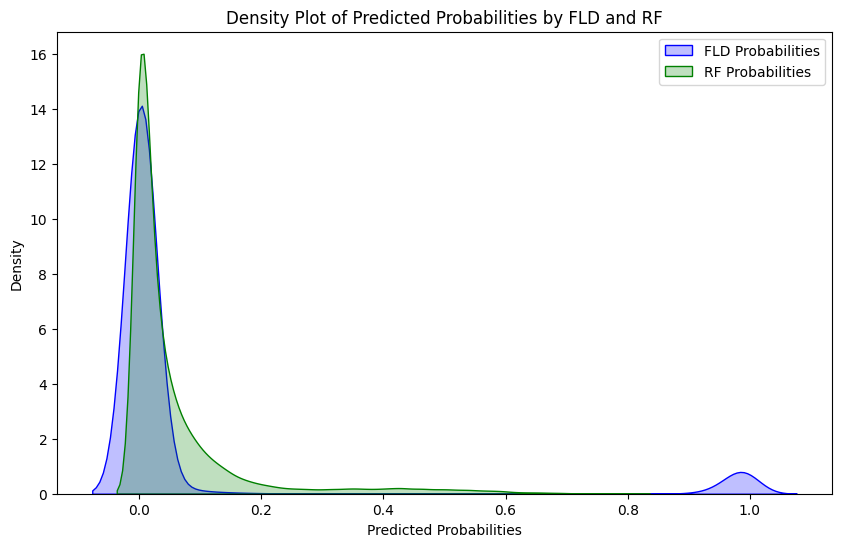

In [ ]:
# Get predicted probabilities for RF
rf_probs = rf.predict_proba(X_test)[:, 1]

# For FLD, get decision scores and convert them to probabilities
fld_scores = lda.decision_function(X_test)
fld_probs = 1 / (1 + np.exp(-fld_scores))

# Plotting the density plots
plt.figure(figsize=(10, 6))
sns.kdeplot(fld_probs, label='FLD Probabilities', color='blue', shade=True)
sns.kdeplot(rf_probs, label='RF Probabilities', color='green', shade=True)
plt.title('Density Plot of Predicted Probabilities by FLD and RF')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()

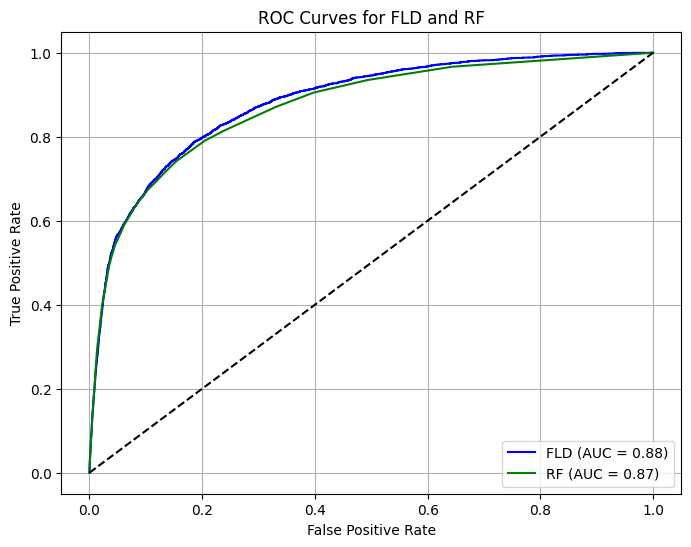

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve from both models
fpr_fld, tpr_fld, _ = roc_curve(y_test, lda.decision_function(X_test))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Calculate AUC
auc_fld = auc(fpr_fld, tpr_fld)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_fld, tpr_fld, label=f'FLD (AUC = {auc_fld:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for FLD and RF')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()